This is the code to pre-process and visualize the given dataset. The dataset used is COVID-19 District-wise Statistics of all cases in Tamil Nadu.
The data is available for 10 different dates.
I have downloaded the 10 files and merged them. The data cleaning is done through the python code. No work has been done on excel/csv files.

In [ ]:
import pandas as pd
import os
new_directory = 'C:/Users/aarus/OneDrive/Desktop/covid_dataset'
os.chdir(new_directory)

data_04_08_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_04_08_2020.csv')
data_06_08_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_06_08_2020.csv')
data_06_09_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_06_09_2020.csv')
data_13_08_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_13_08_2020.csv')
data_13_09_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_13_09_2020.csv')
data_15_09_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_15_09_2020.csv')
data_17_08_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_17_08_2020.csv')
data_22_07_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_22_07_2020.csv')
data_25_07_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_25_07_2020.csv')
data_26_08_2020 = pd.read_csv('C:/Users/aarus/OneDrive/Desktop/covid_dataset/districtwise_statistics_of_covid_19_cases_in_tn_as_on_26_08_2020.csv')


The following code is to make sure column names across files are consistent. 

In [166]:
data_22_07_2020.rename(columns={'Discharged cases as on 22.07.2020': 'Discharged Cases as on 22.07.2020', 'Death cases as on 22.07.2020': 'Death Cases as on 22.07.2020'}, inplace=True)

I have added a column for Date before appending all the files. I then append the files and remove 'S.No' columns. A few districts mentioned in the dataset are not considered for the analysis as they do not seem as relevant.

In [ ]:
dataset_names = ['data_04_08_2020', 'data_06_08_2020', 'data_06_09_2020', 'data_13_08_2020', 'data_13_09_2020', 'data_15_09_2020', 'data_17_08_2020', 'data_22_07_2020', 'data_25_07_2020', 'data_26_08_2020']
dataframe_total=[]
for dataset_name in dataset_names:
    exec(f"{dataset_name}['Date'] = '{dataset_name[5:]}'")
    # exec(f"{dataset_name}.drop('''S.\n No''', axis=1, inplace=True)") - will do it in the next step.
    exec(f"{dataset_name}.columns = [col.split(''' as on ''')[0] if ''' as on ''' in col else col for col in {dataset_name}.columns]")
    dataframe_total.append(eval(dataset_name))

merged_data = pd.concat(dataframe_total, ignore_index=True)

In [ ]:
merged_data.drop(['S.No', 'S. No', 'S.\n No'], axis=1, inplace=True)
districts_to_drop = ['Railway Surveillance', 'Airport Surveillance (International)', 'Airport Surveillance (Domestic)', 'Grand Total', 'Airport Surveillance (International)']
drop = merged_data['District'].isin(districts_to_drop)
filtered_data = merged_data[~drop]
filtered_data.sort_values(by='District', inplace=True)
filtered_data['District'] = filtered_data['District'].replace({'Tiruchirappalli':'Tiruchirapalli'})

In [ ]:
filtered_data['Date'] = filtered_data['Date'].str.replace('_', '-')
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], format='%d-%m-%Y')

In [ ]:
filtered_data=filtered_data.sort_values(by = ['District','Date'])
filtered_data.head(20)

PART 2: The following plot shows Active Cases in all the districts over time. 
For the presentation, a plot for the 10 largest districts of Tamil Nadu are considered.

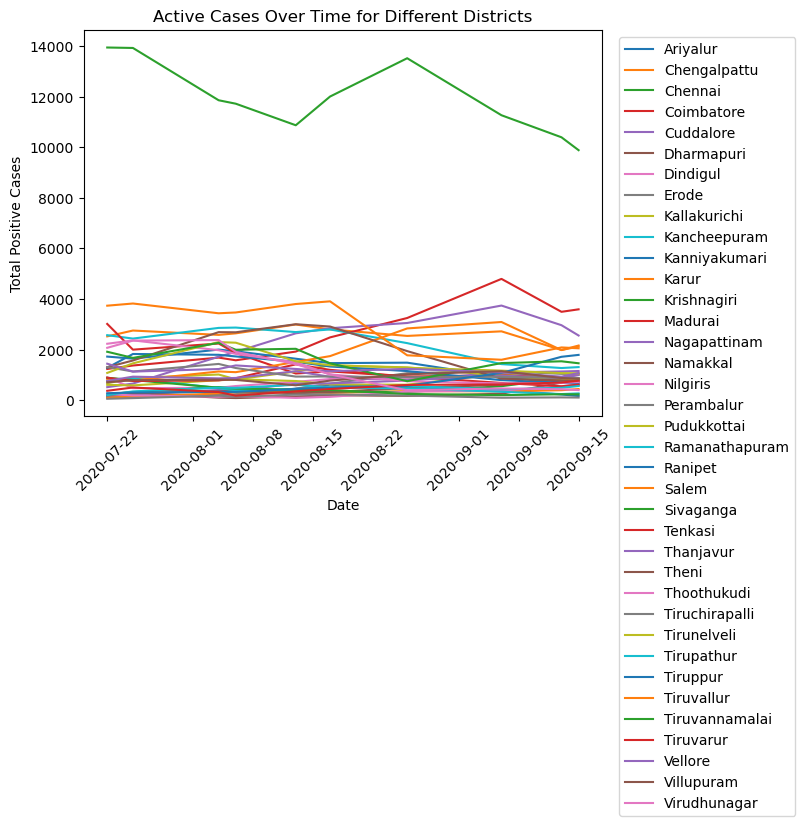

In [171]:
import matplotlib.pyplot as plt
districts_to_plot = filtered_data['District'].unique()
for district in districts_to_plot:
    district_data = filtered_data[filtered_data['District'] == district]
    plt.plot(district_data['Date'], district_data['Active Cases'], label=district)
plt.title('Active Cases Over Time for Different Districts')
plt.xlabel('Date')
plt.ylabel('Total Positive Cases')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()


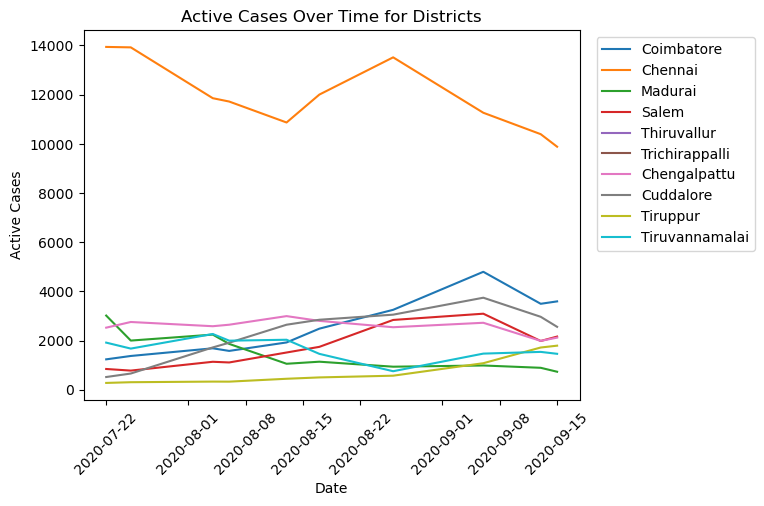

In [172]:
districts_to_plot = ['Coimbatore', 'Chennai', 'Madurai', 'Salem', 'Thiruvallur',
                     'Trichirappalli', 'Chengalpattu', 'Cuddalore', 'Tiruppur', 'Tiruvannamalai']
for district in districts_to_plot:
    district_data = filtered_data[filtered_data['District'] == district]
    plt.plot(district_data['Date'], district_data['Active Cases'], label=district)

plt.title('Active Cases Over Time for Districts')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.xticks(rotation=45)
plt.show()

Calculations:
1. The % change in active cases from the previous date, for each district.
2. The total number of active cases in a month for each district.
3. The % change in number of monthly active cases, by district.


In [ ]:
filtered_data['Active Cases Diff'] = filtered_data.groupby('District')['Active Cases'].diff()
filtered_data['% Increase in Active Cases'] = (filtered_data['Active Cases Diff'] / filtered_data['Active Cases'].shift(1)) * 100

In [174]:
filtered_data['Month'] = filtered_data['Date'].dt.month
monthly_active_cases = filtered_data.groupby(['District', 'Month'])['Active Cases'].sum().reset_index()
monthly_active_cases['Active Cases Diff2'] = monthly_active_cases.groupby('District')['Active Cases'].diff()
monthly_active_cases['% Increase in Active Cases by Month'] = (monthly_active_cases['Active Cases Diff2'] / monthly_active_cases['Active Cases'].shift(1)) * 100
filtered_data = pd.merge(filtered_data, monthly_active_cases[['District', 'Month', '% Increase in Active Cases by Month']], on=['District', 'Month'], how='left')

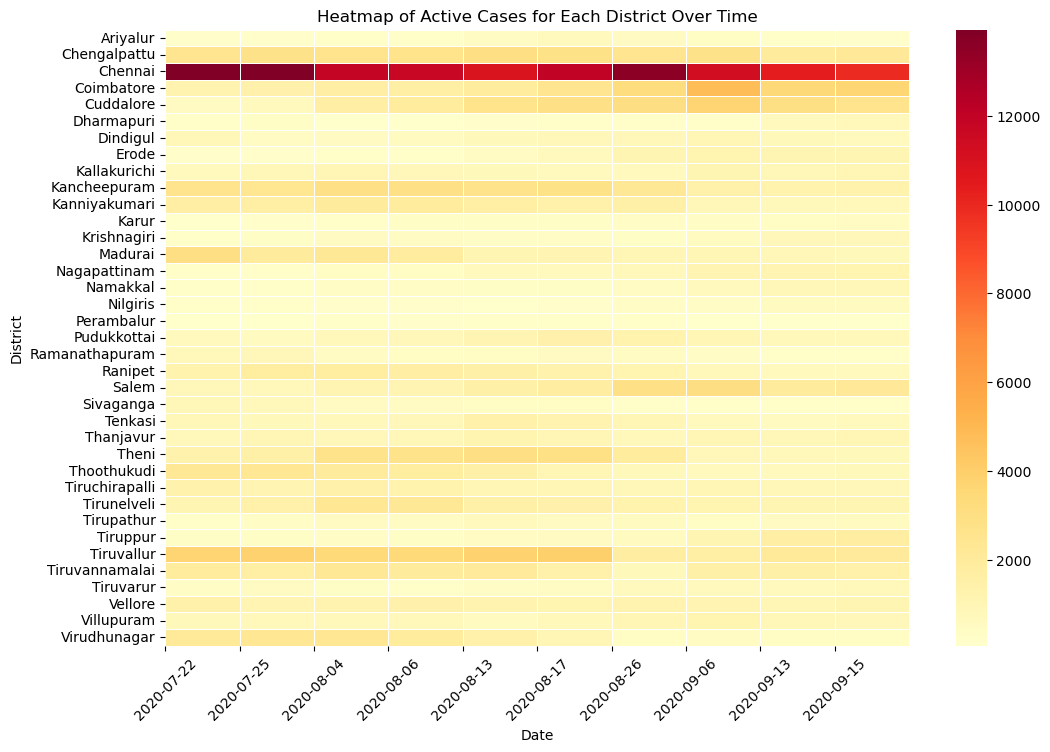

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
heatmap_data = filtered_data.pivot(index='District', columns='Date', values='Active Cases')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linecolor='white', linewidth=0.5)

date_labels = heatmap_data.columns.strftime('%Y-%m-%d')
plt.xticks(ticks=range(len(date_labels)), labels=date_labels, rotation=45)

plt.title('Heatmap of Active Cases for Each District Over Time')
plt.xlabel('Date')
plt.ylabel('District')
plt.show()


10 Scatter Plots for each date - showing number of active cases in each district on that day. However, the graph is less informative than the heat map.

In [ ]:
import matplotlib.pyplot as plt

dates = ['2020-07-22', '2020-07-25', '2020-08-04', '2020-08-06', '2020-08-13',
         '2020-08-17', '2020-08-26', '2020-09-06', '2020-09-13', '2020-09-15']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

handles = []
for i, date in enumerate(dates):
    date_data = filtered_data[filtered_data['Date'] == date]
    for district in date_data['District'].unique():
        district_data = date_data[date_data['District'] == district]
        scatter = axes[i].scatter([district] * len(district_data), district_data['Active Cases'], label=district)
        
        if i == 0:
            handles.append(scatter)
    
    axes[i].set_title(f'Active Cases on {date}')
    axes[i].set_ylabel('Active Cases')
    axes[i].set_xticks([])
    axes[i].grid(True)

fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.02, 1), title='District')
plt.tight_layout()
plt.show()


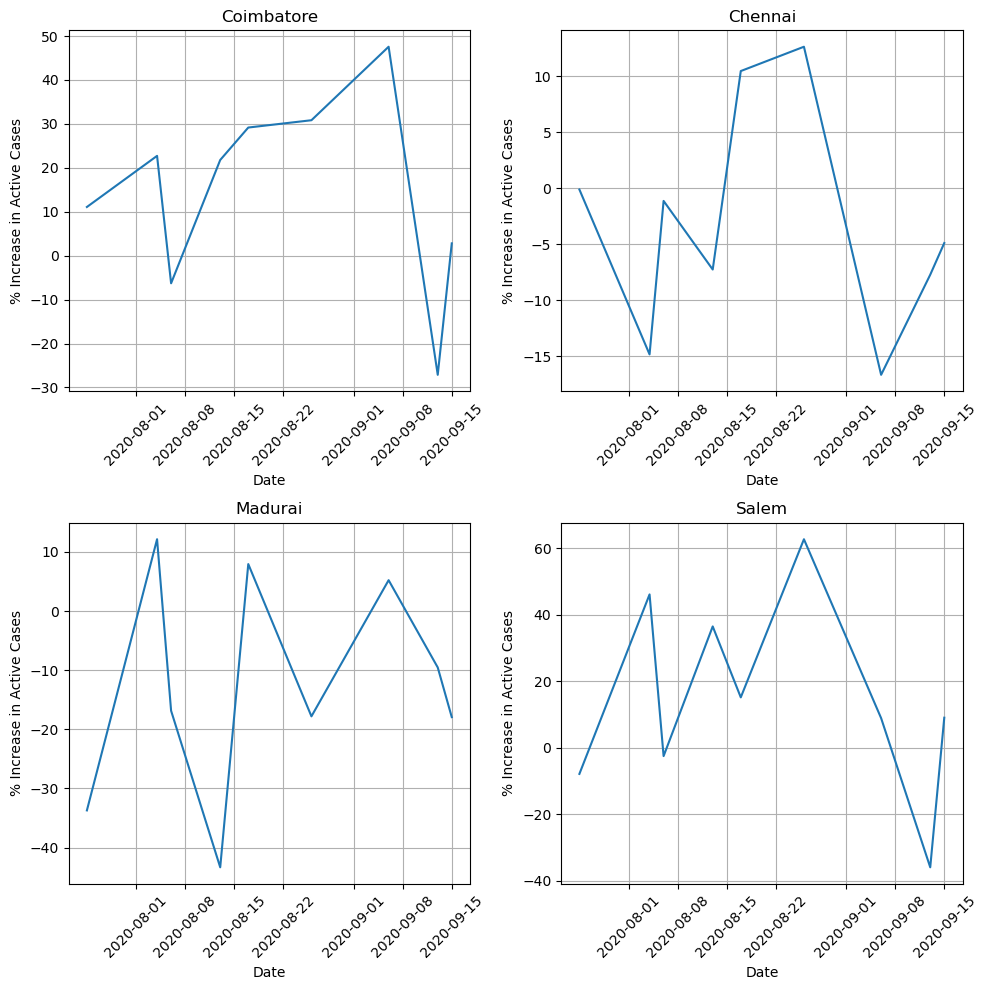

In [180]:
import matplotlib.pyplot as plt

daily_increase = filtered_data.groupby(['District', 'Date'])['% Increase in Active Cases'].mean().reset_index()
districts_to_plot = ['Coimbatore', 'Chennai', 'Madurai', 'Salem']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes = axes.flatten()

for i, district in enumerate(districts_to_plot):
    district_data = daily_increase[daily_increase['District'] == district]
    axes[i].plot(district_data['Date'], district_data['% Increase in Active Cases'])
    axes[i].set_title(f'{district}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('% Increase in Active Cases')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()



PART 3- Spatial Analysis

To plot the map of Tamil Nadu - 2 shapefiles - one in .shx format, second in .kml format were found.

The .shx file does not contain district name as an identifier. To merge it with Covid-19 dataset, I found latitude and longitude data for each district.

Latitude and Longitude data ( District Level Database by ICRISAT) was merged to Covid-19 dataset. However, the co-ordinates in this data are not precise and do not present an accurate map of Tamil Nadu. 

Hence, the other KML file was used and merged to Covid-19 data using District Name as Identifier.

In [181]:
data_coordinates = pd.read_csv('UnApportionedIdentifiers.csv')
TN_coordinates= data_coordinates[data_coordinates['State Name'] == 'Tamil Nadu']
TN_coordinates= TN_coordinates[['State Name','District Name','District Code','Latitude', 'Longitude']]

In [182]:
TN_coordinates['District Name'] = TN_coordinates['District Name'].replace({
    'Chengalpattu MGR Kancheepuram': 'Chengalpattu',
    'South Arcot Cuddalore': 'Cuddalore',
    'North Arcot Vellore': 'Vellore',
    'Tiruchirapalli Trichy': 'Tiruchirappalli',
    'Periyar(Erode)': 'Erode',
    'The Nilgiris': 'Nilgiris',
    'Kanyakumari': 'Kanniyakumari',
    'Virudhunagar Kamarajar': 'Virudhunagar',
    'Sivagangai Pasumpon': 'Sivagangai',
    'Dindigul Anna': 'Dindigul'
})

In [183]:
data_with_coordinates = pd.merge(filtered_data, TN_coordinates, left_on='District', right_on='District Name', how='left')
data_with_coordinates.drop(columns=['District Name'], inplace=True)
print(data_with_coordinates)

         District  Total Positive Cases_x  Discharged Cases  Active Cases  \
0        Ariyalur                     710               574           133   
1        Ariyalur                     800               661           135   
2        Ariyalur                    1094               870           217   
3        Ariyalur                    1154               926           218   
4        Ariyalur                    1573              1098           460   
..            ...                     ...               ...           ...   
365  Virudhunagar                   11400             10221          1021   
366  Virudhunagar                   12128             11552           393   
367  Virudhunagar                   13251             12589           465   
368  Virudhunagar                   13683             13045           436   
369  Virudhunagar                   13767             13162           400   

     Death Cases       Date  Active Cases Diff  % Increase in Active Cases 

C:\Users\aarus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


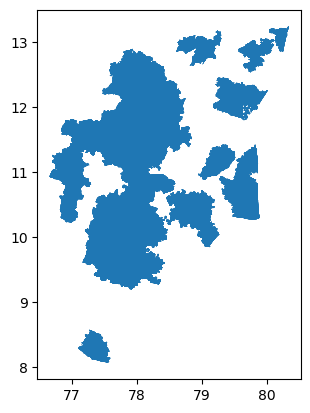

In [184]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = "TAMIL NADU_DISTRICTS.shx"
districts_shapefile = gpd.read_file(shapefile_path)
data_gdf = gpd.GeoDataFrame(data_with_coordinates, geometry=gpd.points_from_xy(data_with_coordinates.Longitude, data_with_coordinates.Latitude))
joint_gdf = gpd.sjoin(districts_shapefile, data_gdf, how="inner", op="intersects")
joint_gdf.plot()
plt.show()

In [186]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
xml_shapefile = gpd.read_file('tamil-nadu.kml', driver='KML')
xml_shapefile['Name'] = xml_shapefile['Name'].str.lower()
data_lower=data_with_coordinates.copy()
data_lower['District'] = data_with_coordinates['District'].str.lower()

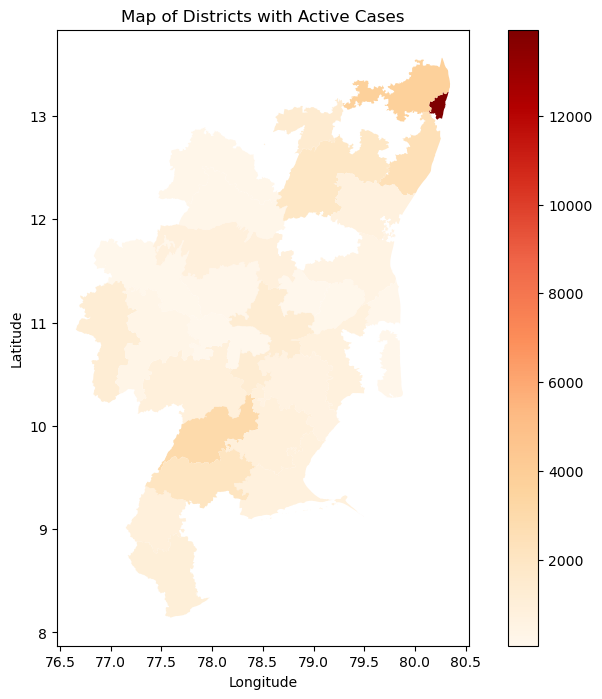

In [192]:
geo_plot_data = pd.merge(data_lower, xml_shapefile, left_on='District', right_on='Name')
geo_plot_data_1 = geo_plot_data[geo_plot_data['Date'] == '2020-07-22']
geo_plot_data_1 = geo_plot_data_1[['District', 'Active Cases', 'geometry']]
geometry_series = gpd.GeoSeries(geo_plot_data_1['geometry'])

gdf_map = gpd.GeoDataFrame({'geometry': geometry_series, 'Active Cases': geo_plot_data_1['Active Cases']})

gdf_map.plot(column='Active Cases', cmap='OrRd', figsize=(10, 8), legend=True)
plt.title('Map of Districts with Active Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()                                  

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

geo_plot_data_filtered = geo_plot_data[geo_plot_data['District'] != 'Chennai']
geo_plot_data_1 = geo_plot_data_filtered[geo_plot_data_filtered['Date'] == '2020-08-17']
geo_plot_data_1 = geo_plot_data_1[['District', 'Active Cases', 'geometry']]
gdf_map = gpd.GeoDataFrame(geo_plot_data_1)

gdf_map.plot(column='Active Cases', cmap='Blues', figsize=(10, 8), legend=True)
plt.title('Map of Districts with Active Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
